## Purpose of the project

In this project we are aiming to investigate data and build a regression model, use it for machine learning and retrieve of our results.

We want to invastigate how various satisfation factors are associated with a decision of an employee to leave the company (Attrition). We also want to control for gender (as females may stick to the job more as they are disadvantaged on the labor market), total workung years (as those who are in the company for a long time may be more loyal), and monthly income of an employee (as those who are paid more may be less likely to leave the job). 

> We use the following dataset for our analysis: https://www.kaggle.com/datasets/saurabhbadole/hr-employee-attrition 

### Relevance

Our project will help HR workers in a company to understand how subjective satisfaction factors are associated with decision to leave the company. The analysis will help to understand if it is important to pay attention to such factors as 

1) general job satisfaction, 

2) work environment satisfaction, 

3) work relationship satisfaction are important for workers in terms of staying at company. 

Potentially, our research can boost employee support programs from the company. 

### Project pipeline

Our project pipeline is the following (it is linear):

1. State our hypotheses, choose variables, load and prepare the data for further analysis

2. Descriptively explore target and predictive variables

3. Explore relations between each predictive and target variables

4. Build binary logistic regression model for machine learning, train the model and test it

5. Find impovements for a model and make conclusions

## Data loading and preparation

Let us start with data loading and data preparation for further analysis

In [16]:
import os
import pandas as pd

os.getcwd()

data = pd.read_csv("HR.csv")

Our full data has the following variables:

In [17]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Here you can take a look at our full data

In [18]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**We decided to pick 7 variables for analysis:**

*Attrition* - Employee turnover, categorical: Yes/No
*EnvironmentSatisfaction* - Satisfaction with the work environment, numerical: 1-4
*RelationshipSatisfaction* - Satisfaction with workplace relationships, numerical: 1-4
*JobSatisfaction* - Job satisfaction, numerical: 1-4
*Gender* - Gender, categorical: Male/Female
*TotalWorkingYears* - Total years of work experience, numerical
*MonthlyIncome* - Monthly income, numerical

*Where levels are from 1 to 4, 1 - Very bad while 4 - very good*

In [19]:
df = data[["Attrition", "JobSatisfaction", "RelationshipSatisfaction", "EnvironmentSatisfaction", "Gender", "TotalWorkingYears", "MonthlyIncome"]]

df.head()

,Attrition,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction,Gender,TotalWorkingYears,MonthlyIncome
0,Yes,4,1,2,Female,8,5993
1,No,2,4,3,Male,10,5130
2,Yes,3,2,4,Male,7,2090
3,No,3,3,4,Female,8,2909
4,No,2,4,1,Male,6,3468


Let us take a look at distribution of categorical variables we have. We can see that Attrition is distributed badly for ML, there are few people who left the company compared to those who did not. We also can see that there are more males in our sample.

In [20]:
print(df["Attrition"].value_counts())

print(df["Gender"].value_counts())

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Gender
Male      882
Female    588
Name: count, dtype: int64


Now let us recode our categorical variables

In [21]:
#recoding attrition
df.dropna(axis = 0)

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

C:\Users\79504\AppData\Local\Temp\ipykernel_6052\911895306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
C:\Users\79504\AppData\Local\Temp\ipykernel_6052\911895306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})


### Descriptive stats of variables

Let us explore descriptive statistics of our variables

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

stats_summary = df.describe(include="all").T

numeric_columns = ["EnvironmentSatisfaction", "RelationshipSatisfaction", 
                   "JobSatisfaction", "TotalWorkingYears", "MonthlyIncome"]

stats_summary.loc[numeric_columns, "Skew"] = df[numeric_columns].skew()
stats_summary.loc[numeric_columns, "Kurtosis"] = df[numeric_columns].kurtosis()
stats_summary

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0,NaN,NaN
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0,-0.329672,-1.222193
RelationshipSatisfaction,1470.0,2.712245,1.081209,1.0,2.0,3.0,4.0,4.0,-0.302828,-1.184814
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0,-0.321654,-1.202521
Gender,1470.0,0.600000,0.490065,0.0,0.0,1.0,1.0,1.0,NaN,NaN
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0,1.117172,0.918270
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0,1.369817,1.005233


Descriptive stats show us that variables are recoded well, skew and kurtosis depict that distributions of ordinal and continuos variables are more or less good but we will have to recheck it with QQ-plots and tests. 

### Visualizations of distribtuions with plots are presented below

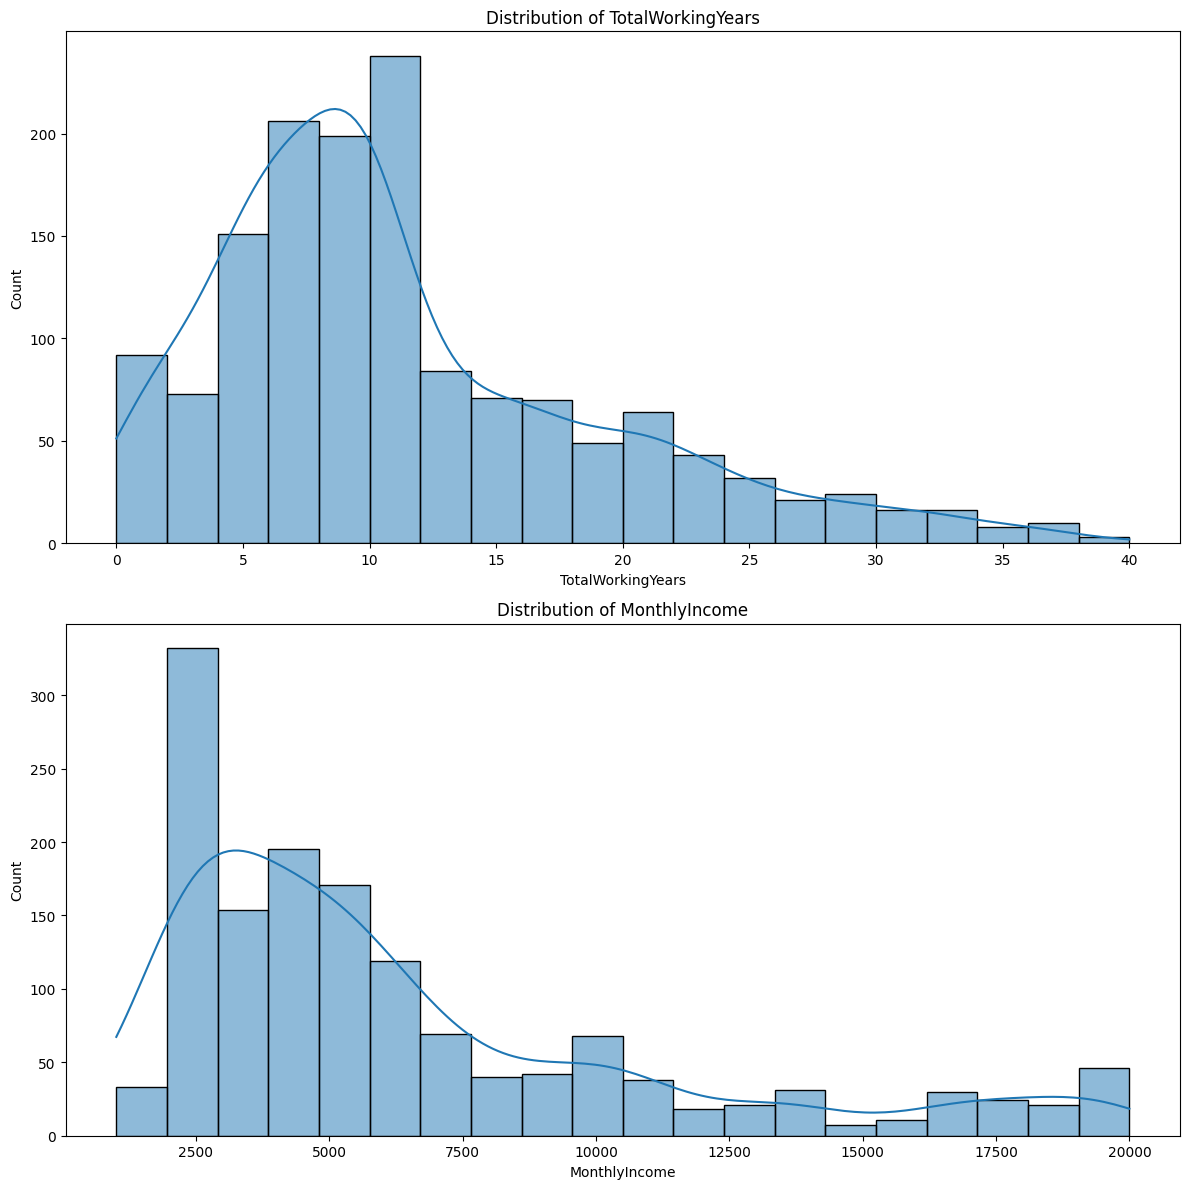

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_columns = ["TotalWorkingYears", "MonthlyIncome"]

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(cont_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

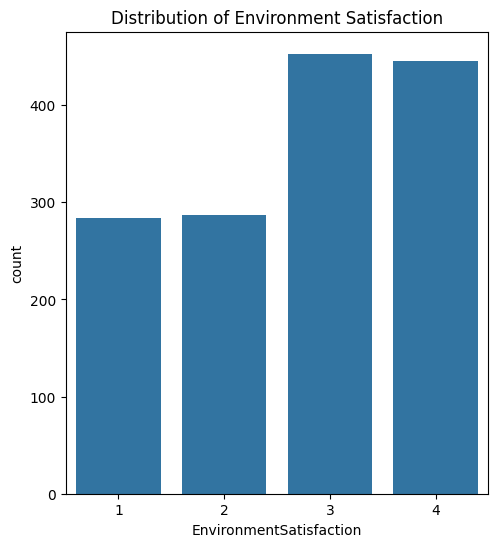

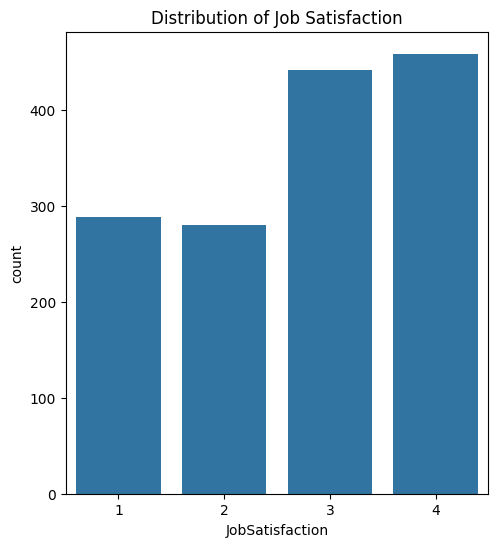

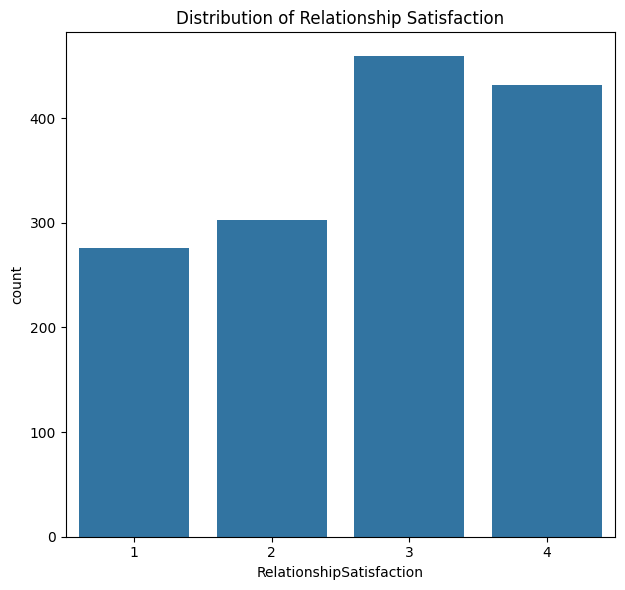

In [24]:
# Environment Satisfaction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='EnvironmentSatisfaction', data=df)
plt.title('Distribution of Environment Satisfaction')

# Job Satisfaction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='JobSatisfaction', data=df)
plt.title('Distribution of Job Satisfaction')

# Relationship Satisfaction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='RelationshipSatisfaction', data=df)
plt.title('Distribution of Relationship Satisfaction')

plt.tight_layout()
plt.show()

## Modeling

Let us proceed to modeling and machine learning

**Spliting data**: 

We divide the data into two subsets: a training set and a testing set (20% of the data will be used for testing). First one allows the model to study the relationship between the features and the target variable, while the second can help to objectively assess how well the model will work with new, invisible data.

The results indicates 1176 rows for training and 294 for testing, with 6 features.

In [25]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


features = df.drop("Attrition", axis = 1)
target = df["Attrition"]

train_features, test_features, train_target, test_target = train_test_split(features, target, 
                        test_size = 0.2,
                        random_state = 12348,
                       )

print(train_features.shape)
print(test_features.shape)
print(train_target.shape)
print(test_target.shape)

(1176, 6)
(294, 6)
(1176,)
(294,)


**Training model**

At this point, the model learns the relationship between the features and the target variable ("Attrition")

In [35]:
model = LogisticRegression()

model.fit(train_features, train_target)

c:\Users\79504\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Then, for a comprehensive assessment of the effectiveness of the model based on unseen data we decided to calculate the accuracy of the model on the test values, create a confusion matrix to evaluate the model's performance in more detail, and finally generate a classification report.

In [27]:
test_pred = model.predict(test_features)

accuracy = accuracy_score(test_target, test_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(test_target, test_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(test_target, test_pred, zero_division=True)
print('Classification Report:')
print(class_report)

Accuracy: 0.83
Confusion Matrix:
[[243   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       1.00      0.00      0.00        51

    accuracy                           0.83       294
   macro avg       0.91      0.50      0.45       294
weighted avg       0.86      0.83      0.75       294



(2.5, -0.5)

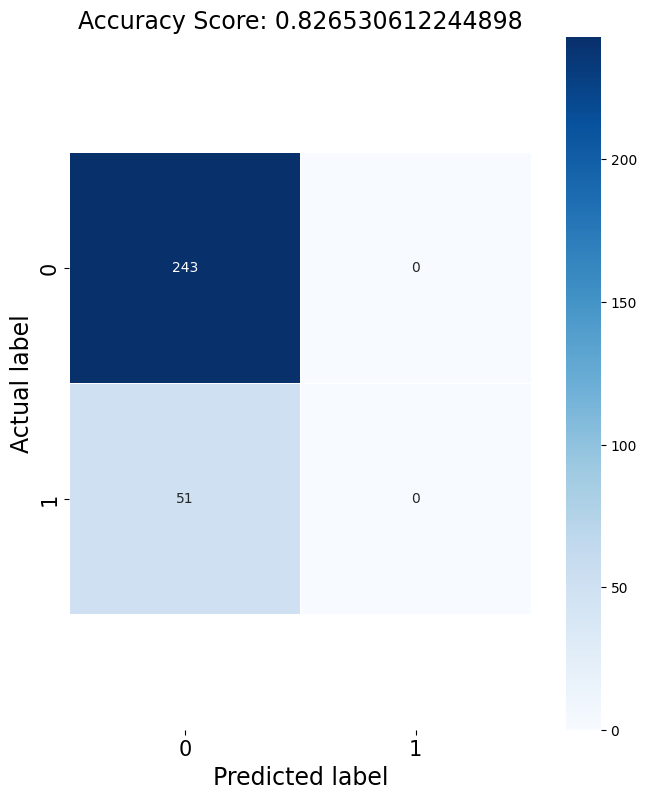

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

cm = metrics.confusion_matrix(test_target, model.predict(test_features))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(accuracy), size = 17);
plt.tick_params(labelsize= 15)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 

**Interpretation of the results**

As for the confusion matrix, 

- True negative (TN) = 243: The model correctly predicted "No Attrition" for 243 employees.
- False Positive (FP) = 0: The model incorrectly predicted "Attrition" for 0 employees. In other words, it was not noted that someone who did not leave was leaving.
- False negative (FN) = 51: The model incorrectly predicted "No Attrition" for 51 employees. This means that 51 employees were missing, who actually left the company.
- True positive (TP) = 0: The model correctly predicted "Attrition" for 0 employees. It was not possible to identify anyone as a beaver.

We met a significant problem, the model is very good at predicting who will not leave (high TN), but it completely fails to predict who will leave (zero TP), this makes the model practically useless for our purpose.


 Also, we can highlight that there is a a significant class imbalance, this biases the model towards predicting the majority class. We need to improve our model using SMOTE to generate synthetic samples for the minority class (Attrition = 1 ).

## Imroving the model

We have witnessed the problem of unbalanced class and to improve our model we can use SMOTE method to create synthetic observations for those who left the company (Attrition = 1), so that our machine will learn better :)

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12348)

features_resampled, target_resampled =  smote.fit_resample(train_features, train_target)

print("Original class distribution:", train_target.value_counts())
print("Resampled class distribution:", pd.Series(target_resampled).value_counts())

Original class distribution: Attrition
0    990
1    186
Name: count, dtype: int64
Resampled class distribution: Attrition
1    990
0    990
Name: count, dtype: int64


As we can see,  using the SMOTE, we managed to equalize our sample. Now, we need to make the same steeps of analysis and constructing the regression model with balanced sample. 

In [31]:
model = LogisticRegression()
model.fit(features_resampled, target_resampled)

c:\Users\79504\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
test_pred = model.predict(test_features)

accuracy = accuracy_score(test_target, test_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(test_target, test_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(test_target, test_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.64
Confusion Matrix:
[[165  78]
 [ 29  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       243
           1       0.22      0.43      0.29        51

    accuracy                           0.64       294
   macro avg       0.54      0.56      0.52       294
weighted avg       0.74      0.64      0.67       294



(2.5, -0.5)

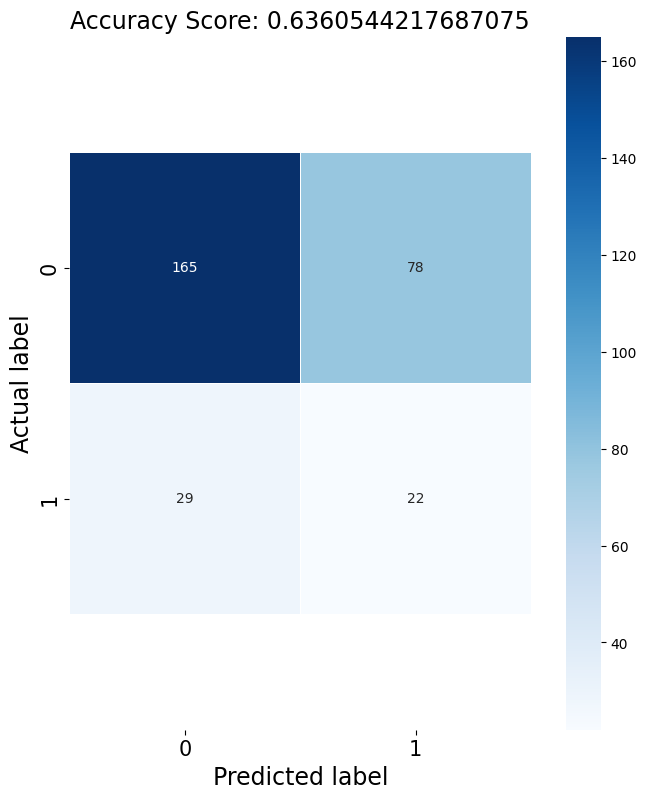

In [33]:
cm = metrics.confusion_matrix(test_target, model.predict(test_features))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(accuracy), size = 17);
plt.tick_params(labelsize= 15)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

**Interpretation the results with resampled data**

As for the confusion matrix, we can notice the distribution is improved : 
- True negative values (TN) = 165: The model correctly predicted "No attrition" for 165 employees.
- False Positive values (FP) = 78: The model incorrectly predicted "Attrition" for 78 employees. In other words, it was noted that 78 people quit who did not do so.
- False negative values (FN) = 29: The model incorrectly predicted "No attrition" for 29 employees. This means that she missed 29 employees who actually left the company.
- True positive results (TP) = 22: The model correctly predicted "Attrition" for 22 employees.

Thus, the model is better than previous, but it still does not predict who will leave the company very well and produces a large number of False Positives.

Then, we want to define the crussial factors which strongly influence on the employees' attrition 

Let us explore the coefficients of our resampled model

In [45]:
import statsmodels.api as sm

constt = sm.add_constant(features_resampled)

logit_model = sm.Logit(target_resampled, constt).fit()

summary_df = pd.DataFrame({
    'Feature': logit_model.params.index,
    'Coefficient': logit_model.params.values,
    'Standard Error': logit_model.bse.values,
    'z-Statistic': logit_model.tvalues.values,
    'p-Value': logit_model.pvalues.values,
    'Odds Ratio': np.exp(logit_model.params.values)  
})

summary_df

Optimization terminated successfully.
         Current function value: 0.536551
         Iterations 6


,Feature,Coefficient,Standard Error,z-Statistic,p-Value,Odds Ratio
0,const,5.252160,0.267691,19.620248,1.038460e-85,190.978311
1,JobSatisfaction,-0.540479,0.051269,-10.542084,5.526051e-26,0.582469
2,RelationshipSatisfaction,-0.406215,0.051633,-7.867297,3.623859e-15,0.666167
3,EnvironmentSatisfaction,-0.664130,0.052036,-12.762868,2.642873e-37,0.514721
4,Gender,-0.437500,0.106211,-4.119166,3.802463e-05,0.645649
5,TotalWorkingYears,-0.087314,0.012514,-6.977136,3.012585e-12,0.916389
6,MonthlyIncome,-0.000039,0.000020,-1.913845,5.563997e-02,0.999961


Based on the results we can draw several **conclusions**

In all cases the coefficients are significant

- The environment satisfaction and job satisfaction have a significant influence on the employee's decision to leave the company (-0.66 and -0.54, respectively), the coefficient is negative (in all cases), thus we can suppose that employees with lower satisfaction with their environment/job are more likely to leave the company.
- The relationship has a moderate importance(-0.40). We can suggest that lower relationship satisfaction is associated with a higher likelihood of attrition.
- TotalWorkingYears quite influence on attrition (-0.09). We can claim that longer years of experience are associated with a lower likelihood of attrition, all else being equal.
- Monthly income has a minimal importance, and slightly influence on the attrition. 
- Gender also has a moderate relationship (-0.44), and males (coded as 1) are less likely to leave the company.

## Conclusions

We tried to build a model predicting how different job "satisfactions" are associated with employees decision to leave the company or not with the help of binary logistic regression ML. 

1. After the exploratory analysis and building the first model we can say that it worked awfully with specificity of 0

2. We tried to rebalance our classes to get better results

- In that case the model works better but it is still far away from being perfect

- In that case all of the predictors are significant and **decrease in job, environment or relationship satisfaction makes employees more likely to leave the company**

3. We need to gain more data about those who leave the company and adjust the model. In that case our model will be able to produce some recommendations for HR workers to decrease attrition levels